### LSTM - Input: 'Close/Last', 'SMA', 'MACD', 'Signal_Line', 'RSI'

In [9]:
import pandas as pd
import numpy as np
# Load the data
data = pd.read_csv("Data_input_2.csv")

# Check for missing values
print(data.isnull().sum())

# Fill missing values or drop rows with missing values
data.fillna(method='ffill', inplace=True)  # forward fill
data.dropna(inplace=True)  # drop any remaining NaNs


Date           0
Close/Last     0
SMA            0
MACD           0
Signal_Line    0
RSI            0
dtype: int64


C:\Users\DELL\AppData\Local\Temp\ipykernel_3052\2442476927.py:10: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)  # forward fill


In [10]:
data['Date'] = pd.to_datetime(data['Date'])

# Tạo các cột phụ để sắp xếp theo năm, tháng, ngày
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day

# Sắp xếp DataFrame theo năm, sau đó tháng, và cuối cùng là ngày
data.sort_values(['Year', 'Month', 'Day'], inplace=True)

# Xóa các cột phụ nếu không cần thiết
data.drop(columns=['Year', 'Month', 'Day'], inplace=True)
data

,Date,Close/Last,SMA,MACD,Signal_Line,RSI
1238,2019-06-28,4660.72,4481.3010,99.321197,90.056725,61.707838
1237,2019-07-01,4766.31,4511.1155,109.460715,93.937523,67.217516
1236,2019-07-02,4747.96,4532.4645,114.693548,98.088728,71.051746
1235,2019-07-03,4773.91,4554.6995,119.556383,102.382259,71.499561
1234,2019-07-05,4757.68,4573.8110,120.709130,106.047633,77.083139
...,...,...,...,...,...,...
4,2024-05-23,10495.82,10181.2985,126.992633,71.836167,76.381399
3,2024-05-24,10549.22,10205.9780,132.541316,83.977197,74.341863
2,2024-05-28,10526.85,10230.3385,133.593631,93.900484,75.571463
1,2024-05-29,10396.40,10257.8745,122.489392,99.618265,66.767226


In [11]:
# Tính toán số lượng dòng cho từng phần
total_rows = len(data)
train_size = int(0.8 * total_rows)
val_size = int(0.1 * total_rows)
test_size = total_rows - train_size - val_size  # Đảm bảo rằng tổng số dòng vẫn bằng total_rows

# Chia DataFrame thành các tập huấn luyện, kiểm tra và kiểm định
data_train = data.iloc[:train_size]
data_val = data.iloc[train_size:train_size + val_size]
data_test = data.iloc[train_size + val_size:]

In [12]:
data_test

,Date,Close/Last,SMA,MACD,Signal_Line,RSI
124,2023-11-30,8850.47,8446.9190,223.476728,190.663496,85.516973
123,2023-12-01,8878.94,8498.9565,225.769427,197.684682,81.707888
122,2023-12-04,8767.82,8538.4995,216.128557,201.373457,75.088187
121,2023-12-05,8749.09,8578.6210,204.618034,202.022373,63.355566
120,2023-12-06,8686.94,8607.7955,188.310154,199.279929,57.462766
...,...,...,...,...,...,...
4,2024-05-23,10495.82,10181.2985,126.992633,71.836167,76.381399
3,2024-05-24,10549.22,10205.9780,132.541316,83.977197,74.341863
2,2024-05-28,10526.85,10230.3385,133.593631,93.900484,75.571463
1,2024-05-29,10396.40,10257.8745,122.489392,99.618265,66.767226


In [13]:
from sklearn.preprocessing import MinMaxScaler

# Chuẩn hóa các cột giá dựa trên tập huấn luyện và áp dụng cho tập kiểm tra và kiểm định
scaler_price = MinMaxScaler(feature_range=(-1, 1))
price_columns = ['Close/Last', 'SMA', 'MACD', 'Signal_Line', 'RSI']
data_train_copy=data_train[price_columns]
data_train[price_columns] = scaler_price.fit_transform(data_train[price_columns])
data_val[price_columns] = scaler_price.transform(data_val[price_columns])
data_test_copy=data_test[price_columns]
data_test[price_columns] = scaler_price.transform(data_test[price_columns])

# Chuyển đổi các cột pandas thành mảng NumPy
train_data = data_train[price_columns].values
val_data = data_val[price_columns].values
test_data = data_test[price_columns].values

# Hiển thị kích thước của các tập dữ liệu
print('Training data shape: {}'.format(train_data.shape))
print('Validation data shape: {}'.format(val_data.shape))
print('Test data shape: {}'.format(test_data.shape))

Training data shape: (991, 5)
Validation data shape: (123, 5)
Test data shape: (125, 5)


C:\Users\DELL\AppData\Local\Temp\ipykernel_3052\4175297681.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train[price_columns] = scaler_price.fit_transform(data_train[price_columns])
C:\Users\DELL\AppData\Local\Temp\ipykernel_3052\4175297681.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_val[price_columns] = scaler_price.transform(data_val[price_columns])
C:\Users\DELL\AppData\Local\Temp\ipykernel_3052\4175297681.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

In [14]:
# Training data
seq_len = 30
X_train, y_train = [], []
for i in range(seq_len, len(train_data)):
  X_train.append(train_data[i-seq_len:i]) # Chunks of training data with a length of 128 df-rows
  y_train.append(train_data[:, 0][i]) #Value of 4th column (Close Price) of df-row 128+1
X_train, y_train = np.array(X_train), np.array(y_train)

###############################################################################

# Validation data
X_val, y_val = [], []
for i in range(seq_len, len(val_data)):
    X_val.append(val_data[i-seq_len:i])
    y_val.append(val_data[:, 0][i])
X_val, y_val = np.array(X_val), np.array(y_val)

###############################################################################

# Test data
X_test, y_test = [], []
for i in range(seq_len, len(test_data)):
    X_test.append(test_data[i-seq_len:i])
    y_test.append(test_data[:, 0][i])    
X_test, y_test = np.array(X_test), np.array(y_test)

print( X_train.shape, y_train.shape)
print( X_val.shape, y_val.shape)
print(X_test.shape, y_test.shape)

(961, 30, 5) (961,)
(93, 30, 5) (93,)
(95, 30, 5) (95,)


In [15]:
type(X_test)

numpy.ndarray

In [16]:
from tensorflow.keras.layers import LSTM, Dense,Dropout
from tensorflow.keras.models import Sequential

# model = Sequential([
#     LSTM(256),
#     Dropout(0.3),
#     LSTM(256),
#     Dropout(0.3),
#     Dense(1)
# ])
model = Sequential([
    LSTM(256, return_sequences=True),
    Dropout(0.3),
    LSTM(256),
    Dropout(0.3),
    Dense(1)
])
model.compile(optimizer='adam', loss='mean_squared_error')
# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=128, validation_data=(X_val, y_val), verbose=1)

# Predicting and reversing normalization
predicted_stock_price = model.predict(X_test)
predicted_stock_price = scaler_price.inverse_transform(np.concatenate((predicted_stock_price, np.zeros((len(predicted_stock_price), 4))), axis=1))[:,0]

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 7s 296ms/step - loss: 0.1174 - val_loss: 0.0145
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 241ms/step - loss: 0.0127 - val_loss: 0.0066
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 247ms/step - loss: 0.0096 - val_loss: 0.0067
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 235ms/step - loss: 0.0083 - val_loss: 0.0057
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 214ms/step - loss: 0.0071 - val_loss: 0.0054
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 238ms/step - loss: 0.0069 - val_loss: 0.0051
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 233ms/step - loss: 0.0065 - val_loss: 0.0051
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 232ms/step - loss: 0.0063 - val_loss: 0.0043
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 224ms/step - loss: 0.0066 - val_loss: 0.0048
Epoch 10/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 215ms/step - loss: 0.0062 - val_loss: 0.0042
Epoch 11/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 241ms/step - loss: 0.0064 - val_loss: 0.0046
Epoch 12/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 220ms/step - loss: 0.0

In [17]:
predict = model.predict(X_test[0][np.newaxis, :, :])
predict = scaler_price.inverse_transform(np.concatenate((predict, np.zeros((len(predict), 4))), axis=1))[:,0]
predict

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


array([9461.3180827])

In [18]:
X_test[0][np.newaxis, :, :]

array([[[ 0.65493206,  0.53787171,  0.91301694,  0.95112871,
          0.77364582],
        [ 0.66470775,  0.55778835,  0.92020484,  0.97757445,
          0.67809003],
        [ 0.62655267,  0.5729229 ,  0.88997951,  0.99146846,
          0.5120263 ],
        [ 0.62012138,  0.58827885,  0.85389258,  0.99391264,
          0.21769841],
        [ 0.59878104,  0.59944499,  0.80276535,  0.98358305,
          0.06986994],
        [ 0.65374057,  0.61333526,  0.79601074,  0.97369637,
          0.25427368],
        [ 0.66749933,  0.62906438,  0.79408903,  0.96532528,
          0.25362893],
        [ 0.73906072,  0.64383131,  0.83807676,  0.96919784,
          0.31671119],
        [ 0.76970633,  0.66095589,  0.88773075,  0.98422683,
          0.54296583],
        [ 0.81314929,  0.67528516,  0.95057933,  1.01135138,
          0.61074745],
        [ 0.84523019,  0.69115685,  1.01477366,  1.04847573,
          0.64377759],
        [ 0.87241809,  0.70847107,  1.07572694,  1.09282117,
          0.699

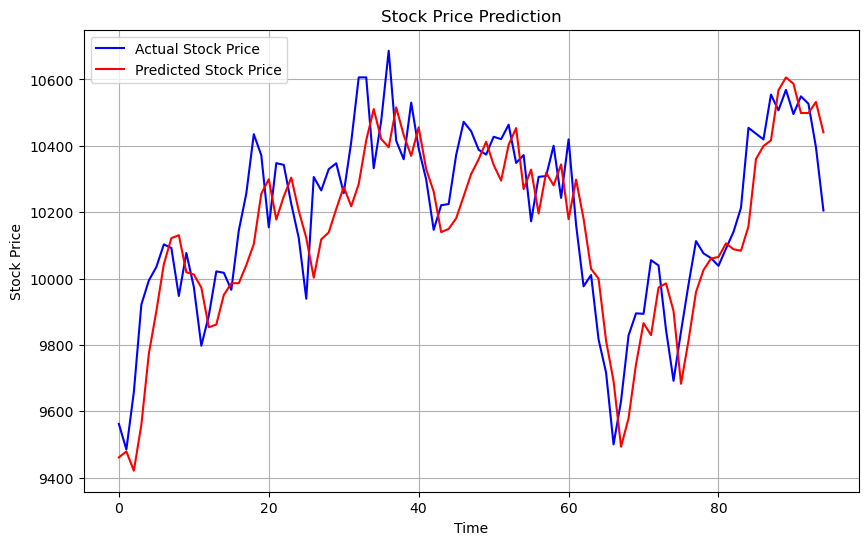

Root Mean Squared Error: 150.35658662540177
Mean Absolute Percentage Error: 0.012386023316173727


In [19]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

# Get actual prices from the last part of the test set
actual_prices = data_test_copy['Close/Last'].values[seq_len:]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(actual_prices, color='blue', label='Actual Stock Price')
plt.plot(predicted_stock_price, color='red', label='Predicted Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.grid(True)
plt.show()

# Calculate RMSE
rmse = mean_squared_error(actual_prices, predicted_stock_price, squared=False)
print(f"Root Mean Squared Error: {rmse}")

mape = mean_absolute_percentage_error(actual_prices, predicted_stock_price)
print(f"Mean Absolute Percentage Error: {mape}")


31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step


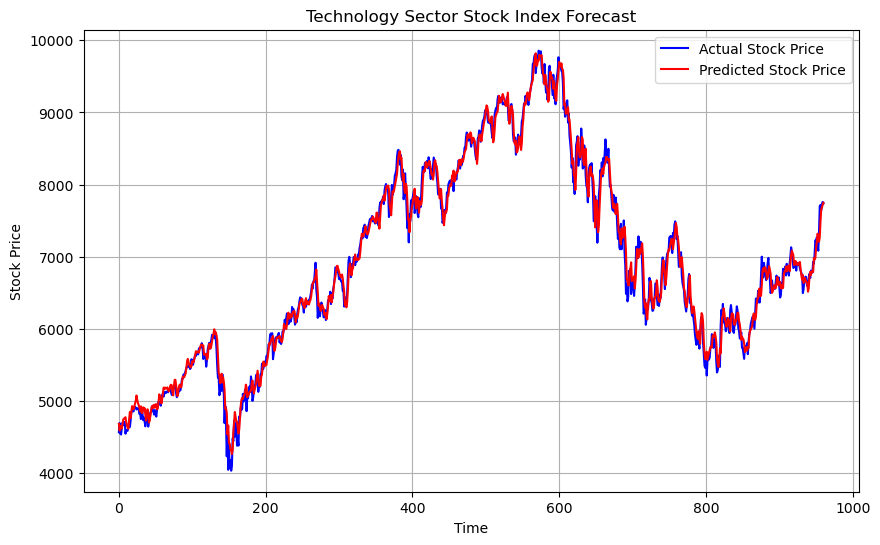

In [20]:
predicted_stock_price_train = model.predict(X_train)
predicted_stock_price_train = scaler_price.inverse_transform(np.concatenate((predicted_stock_price_train, np.zeros((len(predicted_stock_price_train), 4))), axis=1))[:,0]
actual_train_prices = data_train_copy['Close/Last'].values[seq_len:]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(actual_train_prices, color='blue', label='Actual Stock Price')
plt.plot(predicted_stock_price_train, color='red', label='Predicted Stock Price')
plt.title('Technology Sector Stock Index Forecast')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.grid(True)
plt.show()

In [21]:
# model.save('2_layerLSTMTechnical.h5')

In [22]:
import joblib 
# filename = 'predict_model.pkl'
# joblib.dump(model, open(filename, 'wb')) 
  
# # load the model 
# load_model = joblib.load(open(filename, 'rb')) 

In [23]:
# joblib.dump(scaler_price, 'scaler_price_technical2lstm.pkl')

In [24]:
# np.save('X_test12.npy', X_test)
